In [74]:
import pandas
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [75]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")
# Assuming you have your training data and labels stored in `treino` dataframe
X_train = treino.iterrows()
y_train = treino['TARGET_5Yrs'].values

# Assuming you have your test data and labels stored in `teste` dataframe
X_test = teste.iterrows()
y_test = teste['TARGET_5Yrs'].values

Implementação algoritmo K-Nearest Neighbors

In [76]:
def k_nearest_neighbors(train, y_train, test_point, k):
    distances = np.sqrt(np.sum((train[:, :-1] - test_point[:-1])**2, axis=1))
    sorted_indices = distances.argsort()[:k]
    count_1 = 0
    count_0 = 0

    for indice in sorted_indices:
        if train[indice, -1] == 1:
            count_1 += 1
        elif train[indice, -1] == 0:
            count_0 += 1

    if count_1 > count_0:
        query_label = 1
    else:
        query_label = 0
    
    return query_label


Cálculo das métricas (Acurácia, Precisão, Revocação (Recall) e F1)

In [77]:
def calculate_classification_metrics(confusion_matrix):

    true_negative, false_positive, false_negative, true_positive = confusion_matrix
    accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1


Cálculo da Matriz de Confusão

In [78]:
def calculate_confusion_matrix(y_true, y_pred):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for i in range(len(y_pred)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negative += 1
    
    confusion_matrix = true_negative, false_positive, false_negative, true_positive
    return confusion_matrix


Aprendizado Supervisionado - KNN

In [79]:
k_values = [2, 10, 50, 150]

for k in k_values:
    y_pred_k = np.zeros(teste.shape[0])
    j = 0
    for id, row in teste.iterrows():
        point = row.values
        y_pred_k[j] = k_nearest_neighbors(treino.values, y_train, point, k)
        j+=1
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred_k)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)

    print("K:", k)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()


K: 2
Accuracies: 0.5485074626865671
Precisions: 0.7326732673267327
Recalls: 0.44047619047619047
F1 Scores: 0.550185873605948

K: 10
Accuracies: 0.6305970149253731
Precisions: 0.7254901960784313
Recalls: 0.6607142857142857
F1 Scores: 0.6915887850467289



K: 50
Accuracies: 0.6716417910447762
Precisions: 0.7325581395348837
Recalls: 0.75
F1 Scores: 0.7411764705882353

K: 150
Accuracies: 0.6865671641791045
Precisions: 0.7441860465116279
Recalls: 0.7619047619047619
F1 Scores: 0.7529411764705882



Extra - KNN com scikit-learn

In [80]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")


train_X = treino.drop(['TARGET_5Yrs'], axis=1)
test_X = teste.drop(['TARGET_5Yrs'], axis=1)

train_y = treino['TARGET_5Yrs']
test_y = teste['TARGET_5Yrs']

X_train = np.array([row for _, row in train_X.iterrows()])
X_test = np.array([row for _, row in test_X.iterrows()])

def knn(X_train, y_train, X_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

for k in [2, 10, 50, 150]:
    y_pred = knn(X_train, y_train, X_test, k)
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)
    print("K:", k)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()

K: 2
Accuracies: 0.5522388059701493
Precisions: 0.7352941176470589
Recalls: 0.44642857142857145
F1 Scores: 0.5555555555555557

K: 10
Accuracies: 0.6305970149253731
Precisions: 0.7254901960784313
Recalls: 0.6607142857142857
F1 Scores: 0.6915887850467289

K: 50
Accuracies: 0.6716417910447762
Precisions: 0.7325581395348837
Recalls: 0.75
F1 Scores: 0.7411764705882353

K: 150
Accuracies: 0.6865671641791045
Precisions: 0.7441860465116279
Recalls: 0.7619047619047619
F1 Scores: 0.7529411764705882



Aprendizado Não-Supervisionado - K-Means

In [81]:
def k_means(X, k, max_iterations=100):
    # Initialize centroids randomly
    #centroids = X[:,:-1][np.random.randint(X[:,:-1].shape[0], size=k)]
    centroids = X[:,:-1][np.random.choice(X[:,:-1].shape[0], k, replace=False)]
    labels = None

    for _ in range(max_iterations):
        # Assign samples to the nearest centroid
        distances = np.sqrt(np.sum((X[:, :-1][:, np.newaxis] - centroids)**2, axis=2))
        #distances = np.linalg.norm(X[:, np.newaxis, :-1] - centroids, axis=-1)
        current_labels = np.argmin(distances, axis=-1)

        # Update centroids
        new_centroids = np.empty((k, X.shape[1]-1))

        for i in range(k):
            new_centroids[i] = X[current_labels == i, :-1].mean(axis=0)

        # Check for convergence
        if labels is not None and np.all(labels == current_labels):
            break

        centroids = new_centroids
        labels = current_labels
    
    clusters = [X[current_labels == i] for i in range(k)]

    return centroids, clusters

centroids, clusters = k_means(treino.values, 2)

# k_values = [2, 3]

# # Assuming you have your data stored in `treino` dataframe

# for k in k_values:
#     centroids, clusters = k_means(teste.values, k)

print("Centroids k = 2:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")


Centroids k = 2: [[44.2345679  11.88621399  4.12263374  1.5962963   3.72510288 42.71748971
   0.16028807  0.53744856 16.14341564  0.77345679  1.13950617 67.55493827
   0.7037037   1.34156379  2.04465021  0.89773663  0.40164609  0.24588477
   0.77037037]
 [73.5443686  22.61450512  9.18924915  3.54846416  7.80784983 45.36808874
   0.33412969  1.01399317 21.95017065  1.76040956  2.42064846 72.88532423
   1.278157    2.65733788  3.93549488  2.07116041  0.7996587   0.47542662
   1.55187713]]
Cluster 0: [[36.  27.4  7.4 ...  0.4  1.3  0. ]
 [35.  26.9  7.2 ...  0.5  1.6  0. ]
 [58.  11.6  5.7 ...  0.1  1.   1. ]
 ...
 [43.  12.1  5.4 ...  0.4  0.9  0. ]
 [52.  12.   4.5 ...  0.1  0.8  1. ]
 [47.  11.7  4.4 ...  0.1  0.9  1. ]]
Cluster 1: [[74.  15.3  5.2 ...  0.3  1.   0. ]
 [75.  11.4  3.7 ...  0.   0.7  0. ]
 [62.  10.9  6.6 ...  0.1  0.7  1. ]
 ...
 [79.  16.1  5.3 ...  0.5  1.1  0. ]
 [80.  15.8  4.3 ...  0.2  0.8  0. ]
 [68.  12.6  3.9 ...  0.   1.3  1. ]]


k = 3

In [82]:
centroids_new, clusters_new = k_means(treino.values, 3)

print("Centroids k = 3:", centroids_new)
for i, cluster in enumerate(clusters_new):
    print(f"Cluster {i}: {cluster}")


Centroids k = 3: [[6.18514589e+01 1.61694960e+01 6.13050398e+00 2.43342175e+00
  5.01936340e+00 4.79148541e+01 7.95755968e-04 4.96021220e-02
  1.04615385e+00 1.26074271e+00 1.90185676e+00 6.58877984e+01
  1.35384615e+00 2.35755968e+00 3.71485411e+00 9.37135279e-01
  4.92572944e-01 5.33952255e-01 1.07241379e+00]
 [3.98972603e+01 1.23900685e+01 4.29109589e+00 1.62431507e+00
  4.01780822e+00 3.98880137e+01 2.81849315e-01 9.06849315e-01
  2.70698630e+01 7.65753425e-01 1.07534247e+00 6.99722603e+01
  5.34246575e-01 1.18561644e+00 1.71678082e+00 1.11643836e+00
  4.54109589e-01 1.67808219e-01 8.08904110e-01]
 [7.35161290e+01 2.31141439e+01 9.48957816e+00 3.63151365e+00
  8.23895782e+00 4.37598015e+01 4.74193548e-01 1.41910670e+00
  3.07933002e+01 1.75831266e+00 2.33573201e+00 7.51138958e+01
  1.05359801e+00 2.41736973e+00 3.46923077e+00 2.40868486e+00
  8.57320099e-01 3.66749380e-01 1.59627792e+00]]
Cluster 0: [[48.  11.5  4.5 ...  0.4  0.8  1. ]
 [32.  15.2  6.3 ...  0.5  1.   0. ]
 [76.  29

Plotagem dos gŕaficos de K-Means

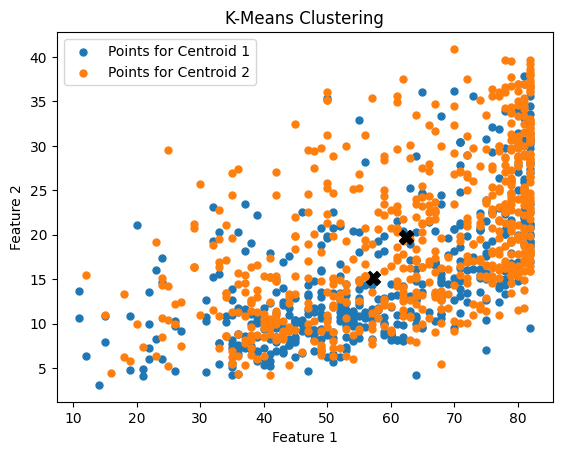

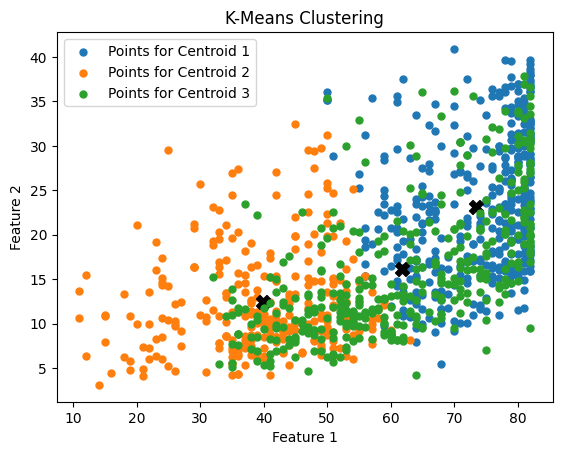

In [83]:
def plot_clusters(centroids, clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        # Plotting the points in the cluster
        plt.scatter(cluster[:, 0], cluster[:, 1], s=25, label=f'Points for Centroid {i+1}')

        # Plotting the centroid of the cluster
        plt.scatter(centroids[i, 0], centroids[i, 1], c='black', s=100, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

centroids, clusters = k_means(treino.values, 2)
plot_clusters(centroids, clusters)

centroids, clusters = k_means(treino.values, 3)
plot_clusters(centroids, clusters)

Extra - K-Means com scikit-learn

In [84]:
from sklearn.cluster import KMeans

def k_means(X, k, max_iterations=100):
    kmeans_model = KMeans(n_clusters=k, max_iter=max_iterations)
    kmeans_model.fit(X)
    centroids = kmeans_model.cluster_centers_
    labels = kmeans_model.labels_
    clusters = [X[labels == i] for i in range(k)]
    
    return centroids, clusters


k = 2

In [85]:
centroids, clusters = k_means(treino.values, 2)

print("Centroids k = 2:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids k = 2: [[44.22427984 11.92860082  4.15144033  1.60761317  3.74958848 42.71131687
   0.15967078  0.53580247 16.06460905  0.78004115  1.14855967 67.5526749
   0.70823045  1.35185185  2.05967078  0.89958848  0.40308642  0.25
   0.77530864  0.4218107 ]
 [73.55290102 22.57935154  9.16535836  3.5390785   7.78754266 45.37320819
   0.33464164  1.01535836 22.01552901  1.75494881  2.41313993 72.88720137
   1.27440273  2.64880546  3.92303754  2.06962457  0.79846416  0.47201365
   1.54778157  0.78156997]]
Cluster 0: [[36.  27.4  7.4 ...  0.4  1.3  0. ]
 [35.  26.9  7.2 ...  0.5  1.6  0. ]
 [58.  11.6  5.7 ...  0.1  1.   1. ]
 ...
 [43.  12.1  5.4 ...  0.4  0.9  0. ]
 [52.  12.   4.5 ...  0.1  0.8  1. ]
 [47.  11.7  4.4 ...  0.1  0.9  1. ]]
Cluster 1: [[74.  15.3  5.2 ...  0.3  1.   0. ]
 [75.  11.4  3.7 ...  0.   0.7  0. ]
 [62.  10.9  6.6 ...  0.1  0.7  1. ]
 ...
 [79.  16.1  5.3 ...  0.5  1.1  0. ]
 [80.  15.8  4.3 ...  0.2  0.8  0. ]
 [68.  12.6  3.9 ...  0.   1.3  1. ]]


Gráfico K-Means com k = 2

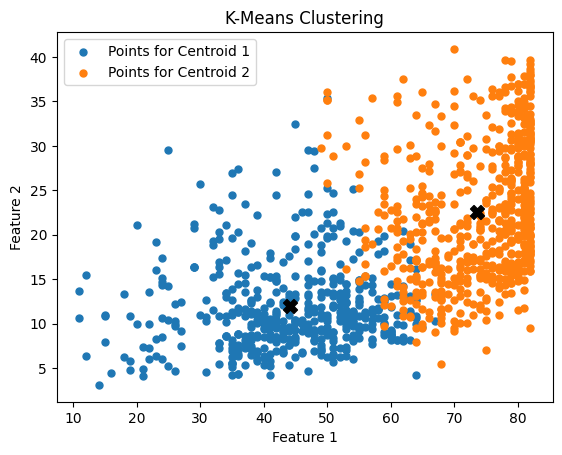

In [86]:
plot_clusters(centroids, clusters)

k = 3

In [87]:
centroids_new, clusters_new = k_means(treino.values, 3)

print("Centroids k = 3:", centroids_new)
for i, cluster in enumerate(clusters_new):
    print(f"Cluster {i}: {cluster}")

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids k = 3: [[6.62578616e+01 1.74968553e+01 6.71100629e+00 2.66226415e+00
  5.44559748e+00 4.85443396e+01 9.43396226e-04 5.18867925e-02
  1.20471698e+00 1.38333333e+00 2.08553459e+00 6.60867925e+01
  1.47641509e+00 2.57547170e+00 4.05691824e+00 1.02389937e+00
  5.42138365e-01 5.94968553e-01 1.16635220e+00 6.98113208e-01]
 [3.92235650e+01 1.14268882e+01 3.91238671e+00 1.49728097e+00
  3.67220544e+00 4.05722054e+01 2.05135952e-01 6.90030211e-01
  2.14634441e+01 7.16616314e-01 1.02628399e+00 6.84722054e+01
  5.67371601e-01 1.16827795e+00 1.73293051e+00 9.81570997e-01
  4.03927492e-01 1.73413897e-01 7.63444109e-01 3.68580060e-01]
 [7.22033097e+01 2.28900709e+01 9.36028369e+00 3.57683215e+00
  8.12907801e+00 4.36877069e+01 4.85815603e-01 1.44326241e+00
  3.12553191e+01 1.72671395e+00 2.29172577e+00 7.53252955e+01
  1.02529551e+00 2.37234043e+00 3.39527187e+00 2.36288416e+00
  8.45626478e-01 3.58156028e-01 1.56075650e+00 7.54137116e-01]]
Cluster 0: [[48.  11.5  4.5 ...  0.4  0.8  1. ]
 

Gráfico K-Means com k = 3

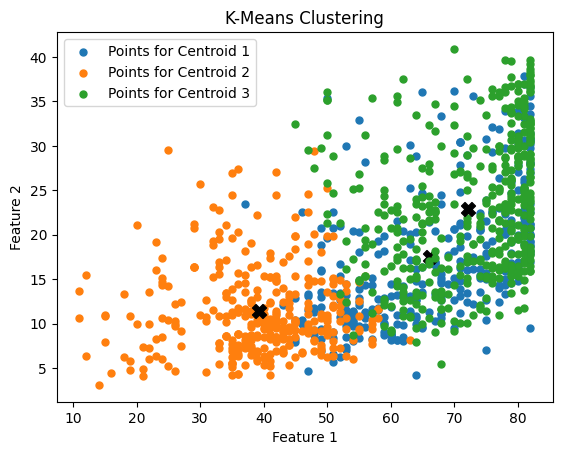

In [88]:
plot_clusters(centroids_new, clusters_new)